In [1]:
import sys
import time
import os, scipy
import torch   
import scipy.sparse as sp 
import numpy as np  
import torch.nn.functional as F 
import pickle
import numpy.random as random
import matplotlib.pyplot as plt 
from math import *
from numpy import transpose,matrix,exp,conj
from numpy.linalg import inv 
from src_lwt.util_final import *
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import f1_score, accuracy_score,roc_auc_score
import sklearn.metrics
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module 
from PPGN import *
from load_data_37 import *

In [2]:
# parameters 
root = "./data/"
phase = 'ALL'
dropout = 0 
dropout_outlayer = 0  
num_node = 36   
dim_input = 6
num_labelper =90
agg_func = "MEAN"
epochs =  100 
b_sz = 32
seed = 842 
learn_method = 'sup' 
max_vali_f1 = 0  
hidden_emb_size = [32,32,32] 
num_layers = len(hidden_emb_size) 
dataSet = 'loc'
ds = dataSet
device = torch.device("cuda" if  torch.cuda.is_available() else "cpu") 
random.seed( seed)
np.random.seed( seed)
torch.manual_seed( seed)
torch.cuda.manual_seed_all( seed)
lr = 0.001
weight_name = 'A_short' 
k=3 
measured_index = [3,   31, 21, 27,7,23,2, 14,  15,17,35, 11,12,32 , 33]# [3, 4, 10, 34, 27,7,23,2, 14, 4,15,17,35, 1,32,33 ]#[0, 1, 3, 4, 7, 8, 9, 10, 13, 19, 26, 30, 34, 35]
name_train = 'train_set_allV_37nodes_1pu.npz' 
name_test = 'test_set_allV_37nodes_1pu.npz'  
dataC = dataCenter( num_labelper,  measured_index , seed = seed)     
A , prob_A = select_A_prob(k, 'A_short')
nodes_layers  = dic_nodes_neib(num_layers,A,prob_A )   
modelname = str(num_labelper) + '_' + phase + '_' +str(len(measured_index)) + '_37node_suptrain.pkl'
saveroot = "./00_saved_final"
savepath = os.path.join(saveroot, modelname ) 
savebest = os.path.join(saveroot, learn_method + '_'+ str(num_labelper) + '_' + phase + '_' +str(len(measured_index)) + '_37node_suptrain.pkl') 
retrain =     False 
features, labels, ind_train ,  ind_test,     ind_measured= load_all_types( num_labelper ,measured_index,  seed = seed )
dist_graph = np.load(os.path.join(root,'dist_graph_37nodes.npy')) 
neib = {}
for node in range(dist_graph.shape[0]):
    neib[node] =   np.array(np.where(dist_graph[node, :] > 0)).flatten()

In [3]:

  

graphSage = GraphSage(num_layers, dim_input,hidden_emb_size  ,   A, prob_A, dropout = dropout ,device = device,    agg_method= agg_func  )
graphSage.to(device) 
classification = Outlayer_fully( hidden_emb_size[-1],  num_node,  dropout = dropout_outlayer) 
classification.to(device)
models = [graphSage, classification]
params = []
for model in models:
    for param in model.parameters():
        if param.requires_grad:
            params.append(param)
optimizer = torch.optim.Adam(params, lr = 0.001, weight_decay = 5e-3)  
retrain = False
if retrain:
    models, optimizer, start_epoch = load_checkpoint(models, optimizer, savepath) 
    graphSage, classification  = models[0], models[1]

 

----------------------EPOCH 0-----------------------
Update the Whole GraphSage
 Step [0/304], Loss: 3.6253, Dealed Nodes [32/9720] 
 Step [5/304], Loss: 3.6894, Dealed Nodes [192/9720] 
 Step [10/304], Loss: 3.6293, Dealed Nodes [352/9720] 
 Step [15/304], Loss: 3.5677, Dealed Nodes [512/9720] 
 Step [20/304], Loss: 3.5181, Dealed Nodes [672/9720] 
 Step [25/304], Loss: 3.5699, Dealed Nodes [832/9720] 
 Step [30/304], Loss: 3.5062, Dealed Nodes [992/9720] 
 Step [35/304], Loss: 3.5144, Dealed Nodes [1152/9720] 
 Step [40/304], Loss: 3.5594, Dealed Nodes [1312/9720] 
 Step [45/304], Loss: 3.4584, Dealed Nodes [1472/9720] 
 Step [50/304], Loss: 3.4522, Dealed Nodes [1632/9720] 
 Step [55/304], Loss: 3.3962, Dealed Nodes [1792/9720] 
 Step [60/304], Loss: 3.3719, Dealed Nodes [1952/9720] 
 Step [65/304], Loss: 3.2801, Dealed Nodes [2112/9720] 
 Step [70/304], Loss: 3.1024, Dealed Nodes [2272/9720] 
 Step [75/304], Loss: 3.1192, Dealed Nodes [2432/9720] 
 Step [80/304], Loss: 2.8997, Deal

 Step [100/304], Loss: 1.0029, Dealed Nodes [3232/9720] 
 Step [105/304], Loss: 0.9008, Dealed Nodes [3392/9720] 
 Step [110/304], Loss: 1.2458, Dealed Nodes [3552/9720] 
 Step [115/304], Loss: 1.0611, Dealed Nodes [3712/9720] 
 Step [120/304], Loss: 1.1359, Dealed Nodes [3872/9720] 
 Step [125/304], Loss: 1.1664, Dealed Nodes [4032/9720] 
 Step [130/304], Loss: 1.1832, Dealed Nodes [4192/9720] 
 Step [135/304], Loss: 1.1602, Dealed Nodes [4352/9720] 
 Step [140/304], Loss: 1.1132, Dealed Nodes [4512/9720] 
 Step [145/304], Loss: 1.2785, Dealed Nodes [4672/9720] 
 Step [150/304], Loss: 1.2909, Dealed Nodes [4832/9720] 
 Step [155/304], Loss: 1.4284, Dealed Nodes [4992/9720] 
 Step [160/304], Loss: 0.8497, Dealed Nodes [5152/9720] 
 Step [165/304], Loss: 1.2425, Dealed Nodes [5312/9720] 
 Step [170/304], Loss: 0.8875, Dealed Nodes [5472/9720] 
 Step [175/304], Loss: 1.0500, Dealed Nodes [5632/9720] 
 Step [180/304], Loss: 1.1430, Dealed Nodes [5792/9720] 
 Step [185/304], Loss: 1.3845, 

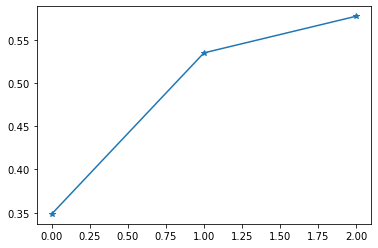

In [4]:
f1_list = []
test_acc = 0 
T1 = 10
T2 =  0
epochs = 3#600
r_sup = [range(i,i+T1) for i in range(0, epochs, int(T1 + T2))]
r_unsup = [range( i , i   + T2) for i in range(T1, epochs, int(T1 + T2))] 
r_unsup = [i for sub in r_unsup for i in sub]
r_sup = [i for sub in r_sup for i in sub]
for epoch in range(epochs ):
    print('----------------------EPOCH %d-----------------------' % epoch) 
    if epoch in r_sup:
        learn_method = 'sup'
        print('Update the Whole GraphSage')
        graphSage, classification, optimizer = apply_model(  optimizer, nodes_layers ,   dataC , 'loc', graphSage, classification,     b_sz,  device  , learn_method )
        max_vali_f1, test_f1 = evaluate(nodes_layers , dataC , ds, graphSage, classification, device,  max_vali_f1,    epoch)
    elif epoch in r_unsup:  
        print('Update only the fully connect layers')
        classification, max_vali_f1, test_f1 =train_classification( nodes_layers ,dataC , graphSage, classification, ds, device, max_vali_f1  )
    f1_list.append(max_vali_f1)
    if test_f1 > test_acc:
        test_acc = test_f1    
        state = {'epoch': epoch + 1, 'state_dict': [graphSage.state_dict(), classification.state_dict()],
             'optimizer': optimizer.state_dict() }
        torch.save(state, savepath) 
plt.plot(f1_list, '*-')      
print('max valid acc', max(f1_list))
print('test acc', test_acc) 

In [5]:
savebest = './00_saved_final/sup_90_ALL_15_37nodes_suptrain.pkl'
models, optimizer, start_epoch = load_checkpoint(models, optimizer , savebest)
graphSage, classification = models[0], models[1]
labels_neib = one_hot_neib(labels, neib )
models = [graphSage, classification]

params = []
for model in models:
    for param in model.parameters():
        if param.requires_grad:
            param.requires_grad = False
            params.append(param)

embs = graphSage( nodes_layers ,features)
logists =  classification(embs)
predicts = torch.max(logists, 1)[1]
labels_test = labels[ind_test] 
labels_neib_test = labels_neib[ind_test]
assert len(labels[ind_test] ) == len(predicts[ind_test]  ) 
test_f1 = f1_score(labels[ind_test] , predicts[ind_test].cpu().data, average="macro")
acc = accuracy_score(labels_test, predicts[ind_test].cpu().data)
acc_neib = hop_acc(labels_neib_test, predicts[ind_test].cpu().data)
print("Test F1:%.4f,  Acc:%.4f, Acc 1 hop: %.4f " %(test_f1, acc, acc_neib))  

=> loading checkpoint './00_saved_final/sup_90_ALL_15_37nodes_suptrain.pkl'
=> loaded checkpoint './00_saved_final/sup_90_ALL_15_37nodes_suptrain.pkl' (epoch 6)
Test F1:0.6968,  Acc:0.7003, Acc 1 hop: 0.8954 


In [15]:
Adj = constructW_stageI(embs , logists  ,A  , 120 ) 

In [17]:
features_X = torch.reshape(features, [features.shape[0],features.shape[1] *features.shape[2] ])
seed = 42; epochs =300
lr = 0.001
weight_decay = 5e-5
batch_size = 32
hidden = [128*3,128*3 ]
dropout =0 
fastmode = False
np.random.seed(seed)
torch.manual_seed( seed)   

 
model2 = GCN(nfeat=features_X.shape[1],
            nhid= hidden,
            nclass=int(len(list(set(labels.numpy()))) ), 
            dropout= dropout)
optimizer2 = torch.optim.Adam(model2.parameters(),
                       lr= lr, weight_decay= weight_decay) 
model_name =  'StageII_all37' + str(num_labelper) + '_1.pkl'
newname =  'StageII_all37' + str(num_labelper) + '_1.pkl'
savepath2 = os.path.join(saveroot, model_name) 
savebest2 = os.path.join(saveroot, newname) 

Epoch: 0001 loss_train: 3.5881 acc_train: 0.0426 loss_val: 3.5023 acc_val: 0.0765 time: 1.1605s
Test set results: loss= 3.5047 accuracy= 0.0725 1-hop accuracy = 0.2731
Epoch: 0002 loss_train: 3.5023 acc_train: 0.0765 loss_val: 3.4292 acc_val: 0.1616 time: 1.1369s
Test set results: loss= 3.4335 accuracy= 0.1540 1-hop accuracy = 0.3593
Epoch: 0003 loss_train: 3.4292 acc_train: 0.1616 loss_val: 3.3627 acc_val: 0.1975 time: 1.1469s
Test set results: loss= 3.3690 accuracy= 0.1886 1-hop accuracy = 0.4086
Epoch: 0004 loss_train: 3.3627 acc_train: 0.1975 loss_val: 3.2990 acc_val: 0.2319 time: 1.1261s
Test set results: loss= 3.3074 accuracy= 0.2278 1-hop accuracy = 0.4377
Epoch: 0005 loss_train: 3.2990 acc_train: 0.2319 loss_val: 3.2365 acc_val: 0.2731 time: 1.1424s
Test set results: loss= 3.2470 accuracy= 0.2673 1-hop accuracy = 0.4836
Epoch: 0006 loss_train: 3.2365 acc_train: 0.2731 loss_val: 3.1744 acc_val: 0.3002 time: 1.2162s
Test set results: loss= 3.1869 accuracy= 0.2895 1-hop accuracy =

Epoch: 0050 loss_train: 0.8198 acc_train: 0.7695 loss_val: 0.7970 acc_val: 0.7743 time: 1.1388s
Test set results: loss= 0.8393 accuracy= 0.7642 1-hop accuracy = 0.9623
Epoch: 0051 loss_train: 0.7970 acc_train: 0.7743 loss_val: 0.7755 acc_val: 0.7751 time: 1.1195s
Test set results: loss= 0.8176 accuracy= 0.7660 1-hop accuracy = 0.9630
Epoch: 0052 loss_train: 0.7755 acc_train: 0.7751 loss_val: 0.7554 acc_val: 0.7754 time: 1.1243s
Test set results: loss= 0.7973 accuracy= 0.7657 1-hop accuracy = 0.9642
Epoch: 0053 loss_train: 0.7554 acc_train: 0.7754 loss_val: 0.7365 acc_val: 0.7771 time: 1.1377s
Test set results: loss= 0.7784 accuracy= 0.7694 1-hop accuracy = 0.9654
Epoch: 0054 loss_train: 0.7365 acc_train: 0.7771 loss_val: 0.7187 acc_val: 0.7800 time: 1.1176s
Test set results: loss= 0.7606 accuracy= 0.7710 1-hop accuracy = 0.9676
Epoch: 0055 loss_train: 0.7187 acc_train: 0.7800 loss_val: 0.7020 acc_val: 0.7803 time: 1.1215s
Test set results: loss= 0.7440 accuracy= 0.7710 1-hop accuracy =

Epoch: 0099 loss_train: 0.4232 acc_train: 0.8453 loss_val: 0.4208 acc_val: 0.8467 time: 1.1366s
Test set results: loss= 0.4674 accuracy= 0.8312 1-hop accuracy = 0.9750
Epoch: 0100 loss_train: 0.4208 acc_train: 0.8467 loss_val: 0.4186 acc_val: 0.8465 time: 1.1255s
Test set results: loss= 0.4659 accuracy= 0.8346 1-hop accuracy = 0.9747
Epoch: 0101 loss_train: 0.4186 acc_train: 0.8465 loss_val: 0.4163 acc_val: 0.8478 time: 1.1048s
Test set results: loss= 0.4629 accuracy= 0.8312 1-hop accuracy = 0.9753
Epoch: 0102 loss_train: 0.4163 acc_train: 0.8478 loss_val: 0.4138 acc_val: 0.8477 time: 1.1323s
Test set results: loss= 0.4617 accuracy= 0.8349 1-hop accuracy = 0.9744
Epoch: 0103 loss_train: 0.4138 acc_train: 0.8477 loss_val: 0.4110 acc_val: 0.8527 time: 1.1020s
Test set results: loss= 0.4579 accuracy= 0.8380 1-hop accuracy = 0.9762
Epoch: 0104 loss_train: 0.4110 acc_train: 0.8527 loss_val: 0.4085 acc_val: 0.8489 time: 1.1285s
Test set results: loss= 0.4568 accuracy= 0.8358 1-hop accuracy =

Epoch: 0148 loss_train: 0.3425 acc_train: 0.8723 loss_val: 0.3409 acc_val: 0.8718 time: 1.1365s
Test set results: loss= 0.3948 accuracy= 0.8580 1-hop accuracy = 0.9772
Epoch: 0149 loss_train: 0.3409 acc_train: 0.8718 loss_val: 0.3396 acc_val: 0.8725 time: 1.1243s
Test set results: loss= 0.3943 accuracy= 0.8568 1-hop accuracy = 0.9765
Epoch: 0150 loss_train: 0.3396 acc_train: 0.8725 loss_val: 0.3386 acc_val: 0.8744 time: 1.1194s
Test set results: loss= 0.3940 accuracy= 0.8559 1-hop accuracy = 0.9769
Epoch: 0151 loss_train: 0.3386 acc_train: 0.8744 loss_val: 0.3377 acc_val: 0.8730 time: 1.1035s
Test set results: loss= 0.3920 accuracy= 0.8605 1-hop accuracy = 0.9769
Epoch: 0152 loss_train: 0.3377 acc_train: 0.8730 loss_val: 0.3367 acc_val: 0.8721 time: 1.1168s
Test set results: loss= 0.3926 accuracy= 0.8552 1-hop accuracy = 0.9765
Epoch: 0153 loss_train: 0.3367 acc_train: 0.8721 loss_val: 0.3358 acc_val: 0.8726 time: 1.1115s
Test set results: loss= 0.3908 accuracy= 0.8571 1-hop accuracy =

Epoch: 0197 loss_train: 0.3016 acc_train: 0.8821 loss_val: 0.3012 acc_val: 0.8828 time: 1.1305s
Test set results: loss= 0.3631 accuracy= 0.8642 1-hop accuracy = 0.9787
Epoch: 0198 loss_train: 0.3012 acc_train: 0.8828 loss_val: 0.3007 acc_val: 0.8821 time: 1.1389s
Test set results: loss= 0.3633 accuracy= 0.8590 1-hop accuracy = 0.9769
Epoch: 0199 loss_train: 0.3007 acc_train: 0.8821 loss_val: 0.3002 acc_val: 0.8840 time: 1.1096s
Test set results: loss= 0.3633 accuracy= 0.8664 1-hop accuracy = 0.9790
Epoch: 0200 loss_train: 0.3002 acc_train: 0.8840 loss_val: 0.2997 acc_val: 0.8821 time: 1.1028s
Test set results: loss= 0.3617 accuracy= 0.8605 1-hop accuracy = 0.9775
Epoch: 0201 loss_train: 0.2997 acc_train: 0.8821 loss_val: 0.2989 acc_val: 0.8824 time: 1.1182s
Test set results: loss= 0.3626 accuracy= 0.8654 1-hop accuracy = 0.9765
Epoch: 0202 loss_train: 0.2989 acc_train: 0.8824 loss_val: 0.2983 acc_val: 0.8837 time: 1.1146s
Test set results: loss= 0.3606 accuracy= 0.8642 1-hop accuracy =

Epoch: 0246 loss_train: 0.2747 acc_train: 0.8934 loss_val: 0.2745 acc_val: 0.8913 time: 1.1630s
Test set results: loss= 0.3427 accuracy= 0.8713 1-hop accuracy = 0.9793
Epoch: 0247 loss_train: 0.2745 acc_train: 0.8913 loss_val: 0.2742 acc_val: 0.8938 time: 1.1291s
Test set results: loss= 0.3433 accuracy= 0.8747 1-hop accuracy = 0.9812
Epoch: 0248 loss_train: 0.2742 acc_train: 0.8938 loss_val: 0.2741 acc_val: 0.8904 time: 1.1373s
Test set results: loss= 0.3426 accuracy= 0.8707 1-hop accuracy = 0.9793
Epoch: 0249 loss_train: 0.2741 acc_train: 0.8904 loss_val: 0.2739 acc_val: 0.8924 time: 1.1231s
Test set results: loss= 0.3430 accuracy= 0.8744 1-hop accuracy = 0.9809
Epoch: 0250 loss_train: 0.2739 acc_train: 0.8924 loss_val: 0.2740 acc_val: 0.8924 time: 1.1058s
Test set results: loss= 0.3431 accuracy= 0.8728 1-hop accuracy = 0.9812
Epoch: 0251 loss_train: 0.2740 acc_train: 0.8924 loss_val: 0.2738 acc_val: 0.8907 time: 1.1379s
Test set results: loss= 0.3431 accuracy= 0.8728 1-hop accuracy =

Epoch: 0295 loss_train: 0.2559 acc_train: 0.8988 loss_val: 0.2556 acc_val: 0.8983 time: 1.1332s
Test set results: loss= 0.3288 accuracy= 0.8824 1-hop accuracy = 0.9830
Epoch: 0296 loss_train: 0.2556 acc_train: 0.8983 loss_val: 0.2553 acc_val: 0.8980 time: 1.1227s
Test set results: loss= 0.3294 accuracy= 0.8799 1-hop accuracy = 0.9821
Epoch: 0297 loss_train: 0.2553 acc_train: 0.8980 loss_val: 0.2546 acc_val: 0.8993 time: 1.1132s
Test set results: loss= 0.3284 accuracy= 0.8809 1-hop accuracy = 0.9830
Epoch: 0298 loss_train: 0.2546 acc_train: 0.8993 loss_val: 0.2540 acc_val: 0.9011 time: 1.1321s
Test set results: loss= 0.3276 accuracy= 0.8840 1-hop accuracy = 0.9830
Epoch: 0299 loss_train: 0.2540 acc_train: 0.9011 loss_val: 0.2533 acc_val: 0.8995 time: 1.1202s
Test set results: loss= 0.3277 accuracy= 0.8799 1-hop accuracy = 0.9833
Epoch: 0300 loss_train: 0.2533 acc_train: 0.8995 loss_val: 0.2529 acc_val: 0.9021 time: 1.1480s
Test set results: loss= 0.3265 accuracy= 0.8849 1-hop accuracy =

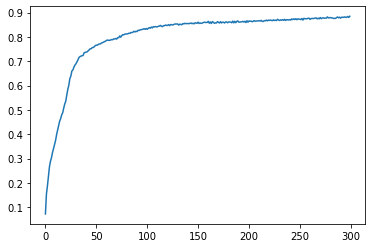

In [18]:
# Train model 
t_total = time.time() 
acc_epoch = []
best_acc = 0
start = time.time()
for epoch in range(300   ):   
    acc_train = train( epoch,  model2,optimizer2,  features_X    , labels   , Adj, ind_train, fastmode, ind_train, batch_size)
    acc_test, acc_hop = test(  model2, features_X , labels ,A , Adj, ind_test)
    acc_epoch.append(acc_test.numpy())
    if acc_test.numpy() > best_acc:
        best_acc = acc_test.numpy() 
        state = {'epoch': epoch + 1, 'state_dict': model2.state_dict() ,
             'optimizer': optimizer2.state_dict() }
        torch.save(state, savepath2)
print("Optimization Finished!")
#print("Total time elapsed: {:.4f}s".format(time.time() - start))
print('The max acc is %.4f' %np.max(acc_epoch))
#plt.plot(acc_epoch)







#print("Total time elapsed: {:.4f}s".format(time.time() - start))
print('The test max acc is %.4f' %np.max(acc_epoch))
print('The test argmax acc is %2d' %np.argmax(acc_epoch))
plt.plot(acc_epoch)